In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-boundaries-heat)

First, we define functions for the PDE and each boundary condition.

In [2]:
phi = @(t, x, u, ux, uxx) uxx;
ga = @(u, ux) u;
gb = @(u, ux) u - 2;

Our next step is to write a function to define the initial condition. This one satisfies the boundary conditions exactly.

In [3]:
init = @(x) 1 + sin(pi * x/2) + 3 * (1 - x.^2) .* exp(-4*x.^2);

Now we can use {numref}`Function {number} <function-parabolic>` to solve the problem.

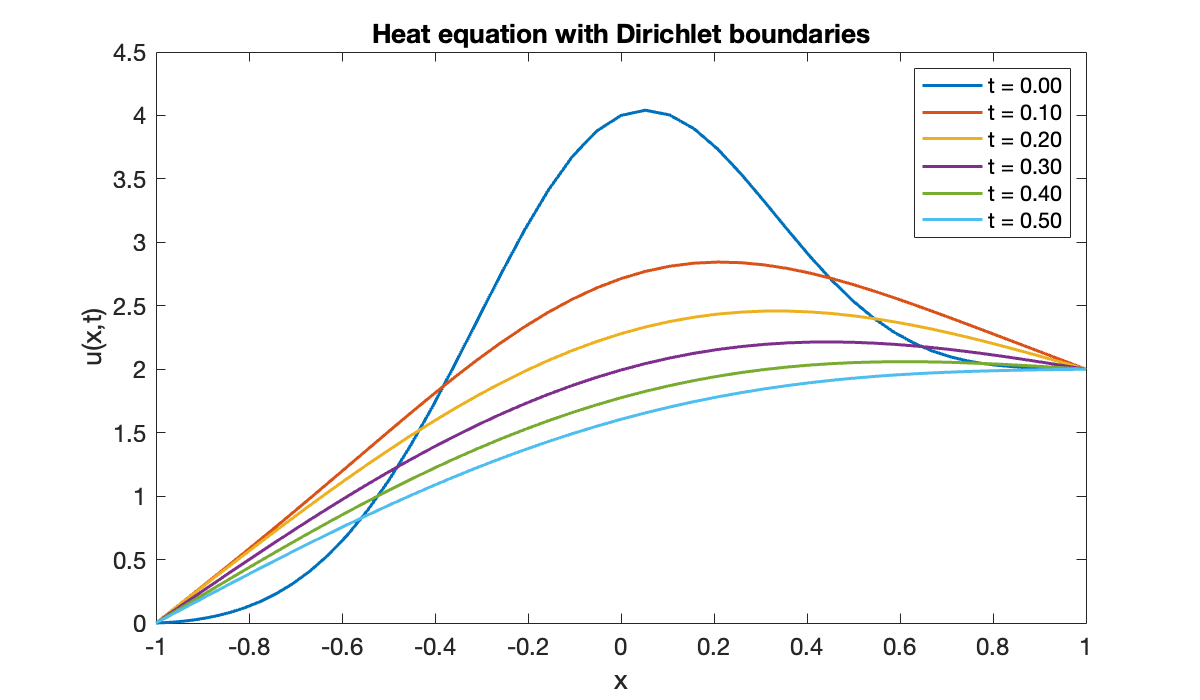

In [4]:
[x, u] = parabolic(phi, [-1, 1], 60, ga, gb, [0, 0.75], init);

clf
for t = 0:0.1:0.5
    str = sprintf("t = %.2f", t);
    plot(x, u(t), displayname=str)
    hold on
end
xlabel("x"),  ylabel("u(x,t)")
legend()
title("Heat equation with Dirichlet boundaries")

In [ ]:
clf
plot(x, u(0))
hold on,  grid on
axis([-1, 1, 0, 4.2])
title('Heat equation with Dirichlet boundaries') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("figures/boundaries-heat.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for t = linspace(0, 0.75, 201)
    cla, plot(x, u(t))
    str = sprintf("t = %.3f", t);
    text(-0.9, 3.8, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid) 